<a href="https://colab.research.google.com/github/BasiraS/data_analytics_2/blob/main/Python/Unit%203%20-%20Python%20Advanced/Mini%20Project/Unit3_Mini_Project_COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Basira Shirzad

# Date: 01-13-2020

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [592]:
# Standard Libraries for visualization and data wrangling 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [593]:
# Import the COVID19 data set into a pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [594]:
# Check the head of the dataframe to get a clear idea of all the columns in the dataframe
df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
17609,2021-01-16,Virginia,51,429391,5706
17610,2021-01-16,Washington,53,290896,3971
17611,2021-01-16,West Virginia,54,108124,1761
17612,2021-01-16,Wisconsin,55,566275,5906


In [595]:
# Rows and Columns of the DataFrame
df.shape

(17614, 5)

In [596]:
# List of Columns in the DataFrame
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [597]:
# Data type of the columns in the DataFrame
df.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Enriching the data frame by adding columns that include data on new covid 19 cases and deaths on daily basis (new cases added everyday)


In [598]:
# Sort the data frame by state and date 
df = df.sort_values(['state', 'date'])
df

,date,state,fips,cases,deaths
586,2020-03-13,Alabama,1,6,0
637,2020-03-14,Alabama,1,12,0
689,2020-03-15,Alabama,1,23,0
742,2020-03-16,Alabama,1,29,0
795,2020-03-17,Alabama,1,39,0
...,...,...,...,...,...
17393,2021-01-12,Wyoming,56,48072,522
17448,2021-01-13,Wyoming,56,48289,522
17503,2021-01-14,Wyoming,56,48701,522
17558,2021-01-15,Wyoming,56,48909,522


In [599]:
# Modified DataFrame to add Month
month = pd.DatetimeIndex(df['date']).month.map("{:02}".format)
year = pd.DatetimeIndex(df['date']).year

df.insert(loc=1, column='year', value=year)
df.insert(loc=2, column='month', value=month)

year_month =  df['year'].astype(str) + '-' + df['month'].astype(str)
df.insert(loc=3, column='year_month', value=year_month)

df

,date,year,month,year_month,state,fips,cases,deaths
586,2020-03-13,2020,03,2020-03,Alabama,1,6,0
637,2020-03-14,2020,03,2020-03,Alabama,1,12,0
689,2020-03-15,2020,03,2020-03,Alabama,1,23,0
742,2020-03-16,2020,03,2020-03,Alabama,1,29,0
795,2020-03-17,2020,03,2020-03,Alabama,1,39,0
...,...,...,...,...,...,...,...,...
17393,2021-01-12,2021,01,2021-01,Wyoming,56,48072,522
17448,2021-01-13,2021,01,2021-01,Wyoming,56,48289,522
17503,2021-01-14,2021,01,2021-01,Wyoming,56,48701,522
17558,2021-01-15,2021,01,2021-01,Wyoming,56,48909,522


In [600]:
# Calculate the number of new cases and new deaths on each day for each state 
df['new cases'] = np.where(df.state == df.state.shift(), df.cases - df.cases.shift(), df.cases)
df['new deaths'] = np.where(df.state == df.state.shift(), df.deaths - df.deaths.shift(), df.deaths)
df

,date,year,month,year_month,state,fips,cases,deaths,new cases,new deaths
586,2020-03-13,2020,03,2020-03,Alabama,1,6,0,6.0,0.0
637,2020-03-14,2020,03,2020-03,Alabama,1,12,0,6.0,0.0
689,2020-03-15,2020,03,2020-03,Alabama,1,23,0,11.0,0.0
742,2020-03-16,2020,03,2020-03,Alabama,1,29,0,6.0,0.0
795,2020-03-17,2020,03,2020-03,Alabama,1,39,0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17393,2021-01-12,2021,01,2021-01,Wyoming,56,48072,522,677.0,33.0
17448,2021-01-13,2021,01,2021-01,Wyoming,56,48289,522,217.0,0.0
17503,2021-01-14,2021,01,2021-01,Wyoming,56,48701,522,412.0,0.0
17558,2021-01-15,2021,01,2021-01,Wyoming,56,48909,522,208.0,0.0


Analyzing COVID19 cases in all states

In [601]:
# First 10 states to have first time COVID19 cases
df[['state','date','cases']].groupby(['state']).min().sort_values(['date']).head(10)

,date,cases
state,,
Washington,2020-01-21,1
Illinois,2020-01-24,1
California,2020-01-25,1
Arizona,2020-01-26,1
Massachusetts,2020-02-01,1
Wisconsin,2020-02-05,1
Texas,2020-02-12,1
Nebraska,2020-02-17,10
Utah,2020-02-25,1


In [602]:
# Last 10 states to have first time COVID19 cases
df[['state','date','cases']].groupby(['state']).min().sort_values(['date']).tail(10)

,date,cases
state,,
Maine,2020-03-12,1
Alaska,2020-03-12,1
Alabama,2020-03-13,6
Idaho,2020-03-13,1
Puerto Rico,2020-03-13,3
Montana,2020-03-13,4
Virgin Islands,2020-03-14,1
Guam,2020-03-15,3
West Virginia,2020-03-17,1


In [603]:
# Top 5 states with recent number of high cases 
df[['state','date','cases']].groupby(['state']).max().sort_values(by='cases', ascending=False).head(5)

,date,cases
state,,
California,2021-01-16,2974966
Texas,2021-01-16,2114858
Florida,2021-01-16,1560178
New York,2021-01-16,1229124
Illinois,2021-01-16,1067230


In [604]:
# Top 5 states with recent number of low cases 
df[['state','date','cases']].groupby(['state']).max().sort_values(by='cases', ascending=False).tail(5)

,date,cases
state,,
Hawaii,2021-01-16,24188
Vermont,2021-01-16,9915
Guam,2021-01-16,8450
Virgin Islands,2021-01-16,2166
Northern Mariana Islands,2021-01-16,128


In [605]:
# Top 5 states with a high rise in new cases
df[['state','date', 'new cases']].groupby(['state']).max().sort_values(by='new cases', ascending=False).head(5)

,date,new cases
state,,
California,2021-01-16,64987.0
Texas,2021-01-16,58256.0
New Jersey,2021-01-16,51092.0
Florida,2021-01-16,31518.0
Ohio,2021-01-16,25721.0


In [606]:
# Top 5 states with a high drop in new cases
df[['state','date', 'new cases']].groupby(['state']).min().sort_values(by='new cases').head(5)

,date,new cases
state,,
Massachusetts,2020-02-01,-7757.0
Louisiana,2020-03-09,-879.0
Arkansas,2020-03-11,-400.0
Puerto Rico,2020-03-13,-337.0
Georgia,2020-03-02,-158.0


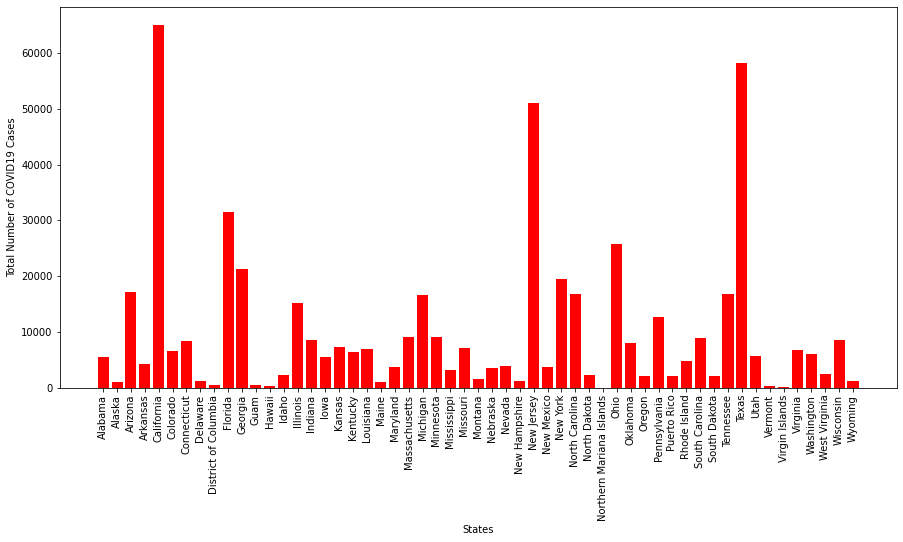

In [607]:
# Total Number of COVID19 Cases per State
df_state = df['state'].unique()
cases = df[['date', 'state', 'new cases']].groupby(['state']).max().sort_values(by='state')
plt.figure(figsize=(15,7))
plt.bar(x=df_state, height=cases['new cases'], color='red')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Total Number of COVID19 Cases')
plt.show()

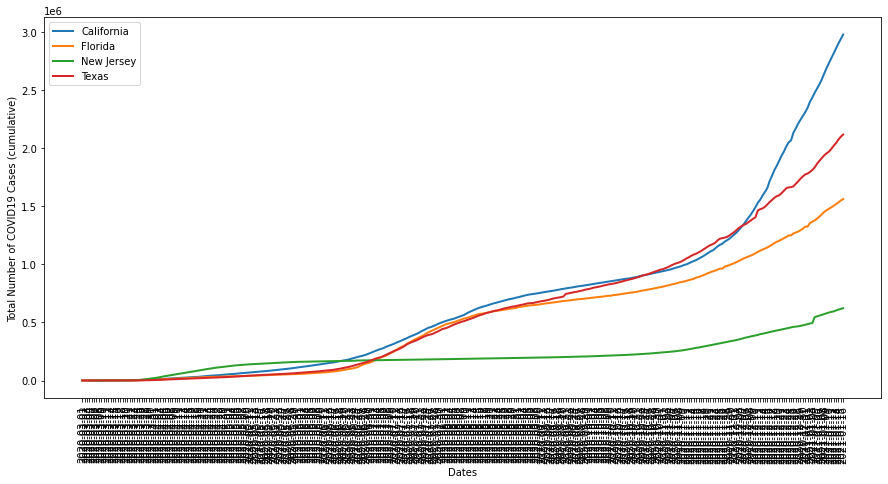

In [608]:
# Covid19 Cases in High Risk States
states = ['California', 'Florida', 'New Jersey', 'Texas']
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-03-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.xlabel('Dates')
plt.ylabel('Total Number of COVID19 Cases (cumulative)')
plt.show()

Text(0, 0.5, 'Number of New Cases')

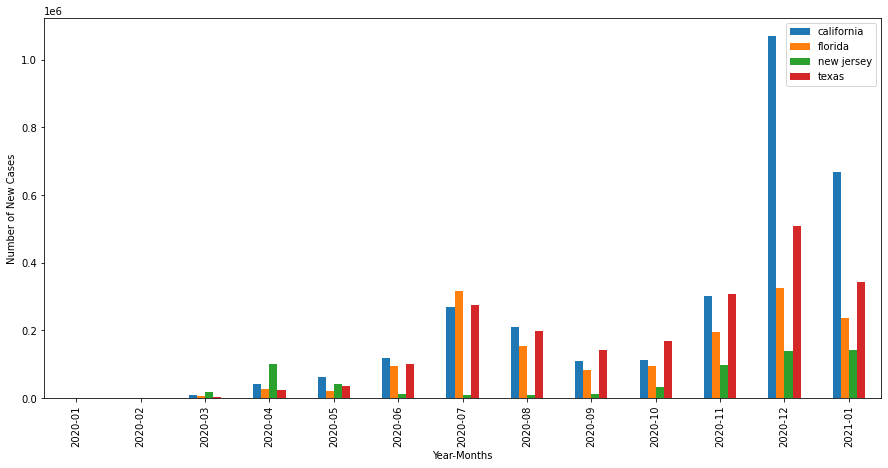

In [609]:
# Covid19 Cases per Month in High Risk States 
date = pd.Series(df['year_month'].unique()).sort_values(ascending=True)
california = df[df.state == 'California'][['year_month', 'new cases']].groupby(['year_month']).sum()
florida = df[df.state == 'Florida'][['year_month', 'new cases']].groupby(['year_month']).sum()
newjersey = df[df.state == 'New Jersey'][['year_month', 'new cases']].groupby(['year_month']).sum()
texas = df[df.state == 'Texas'][['year_month', 'new cases']].groupby(['year_month']).sum()

ca = pd.Series(california['new cases'])
fl = pd.Series(florida['new cases'])
nj = pd.Series(newjersey['new cases'])
tx = pd.Series(texas['new cases'])

new_df = pd.DataFrame({'california': ca, 'florida': fl, 'new jersey': nj, 'texas': tx})
new_df = new_df.fillna(0)
ax = new_df.plot.bar(figsize=(15,7))
ax.set_xlabel("Year-Months")
ax.set_ylabel("Number of New Cases")

Analyzing COVID19 deaths cases in all states

In [610]:
# First 5 states to have first COVID19 death cases
df[['state','date','deaths']][df.deaths !=0].groupby(['state']).min().sort_values(['date']).head(5)

,date,deaths
state,,
Washington,2020-02-29,1
California,2020-03-04,1
Florida,2020-03-06,2
South Dakota,2020-03-10,1
New Jersey,2020-03-10,1


In [611]:
# Last 5 states to have first COVID19 death cases
df[['state','date','deaths']][df.deaths !=0].groupby(['state']).min().sort_values(['date']).tail(5)

,date,deaths
state,,
West Virginia,2020-03-29,1
Hawaii,2020-03-31,1
Northern Mariana Islands,2020-04-01,1
Virgin Islands,2020-04-06,1
Wyoming,2020-04-13,1


In [612]:
# Top 5 states to have a total high number of COVID19 death cases
df[['state','date', 'deaths']].groupby(['state']).max().sort_values(by='deaths', ascending=False).head(5)

,date,deaths
state,,
New York,2021-01-16,40376
California,2021-01-16,33393
Texas,2021-01-16,32581
Florida,2021-01-16,24003
New Jersey,2021-01-16,20414


In [613]:
# Top 5 states to have a total low number of COVID19 death cases
df[['state','date', 'deaths']].groupby(['state']).max().sort_values(by='deaths', ascending=False).tail(5)

,date,deaths
state,,
Alaska,2021-01-16,220
Vermont,2021-01-16,163
Guam,2021-01-16,127
Virgin Islands,2021-01-16,24
Northern Mariana Islands,2021-01-16,2


In [614]:
# Top 5 states to have a high number of COVID19 death cases in a day
df[['state','date', 'new deaths']].groupby(['state']).max().sort_values(by='new deaths', ascending=False).head(5)

,date,new deaths
state,,
New Jersey,2021-01-16,1877.0
Texas,2021-01-16,1202.0
New York,2021-01-16,1036.0
California,2021-01-16,724.0
Georgia,2021-01-16,466.0


In [615]:
# Top 5 states to have a low number of COVID19 death cases in a day
df[['state','date', 'new deaths']][df['new deaths']!=0].groupby(['state']).min().sort_values(by='new deaths', ascending=False).tail(5)

,date,new deaths
state,,
Massachusetts,2020-03-20,-41.0
Missouri,2020-03-18,-67.0
Washington,2020-02-29,-71.0
Nebraska,2020-03-27,-73.0
New York,2020-03-14,-102.0


In [616]:
# Top 5 states to have a low number of COVID19 death cases in a day (latest)
df[['state','date', 'new deaths']][df['new deaths']>0].groupby(['state']).min().sort_values(by=['new deaths', 'date'], ascending=False).head(5)

,date,new deaths
state,,
Wyoming,2020-04-13,1.0
Virgin Islands,2020-04-06,1.0
Northern Mariana Islands,2020-04-01,1.0
Hawaii,2020-03-31,1.0
West Virginia,2020-03-29,1.0


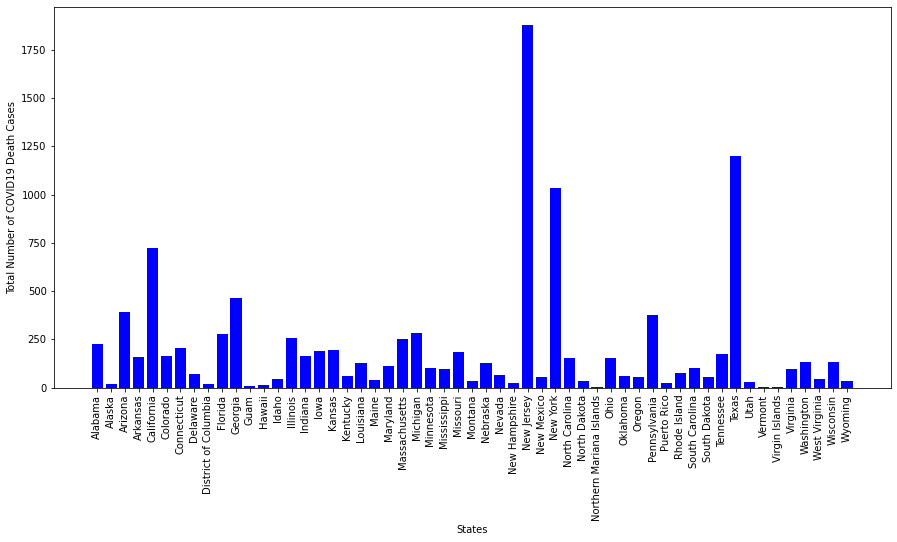

In [617]:
# Total Number of COVID19 Death Cases per State
df_state = df['state'].unique()
cases = df[['date', 'state', 'new deaths']].groupby(['state']).max().sort_values(by='state')
plt.figure(figsize=(15,7))
plt.bar(x=df_state, height=cases['new deaths'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Total Number of COVID19 Death Cases')
plt.show()

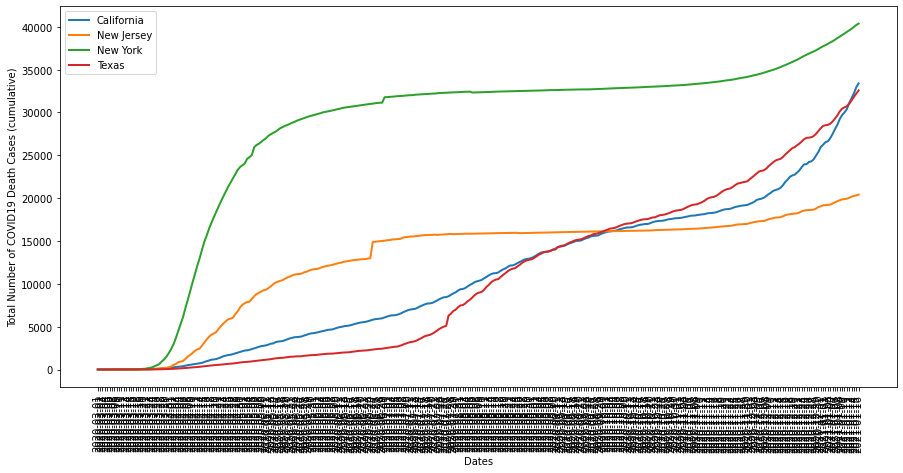

In [618]:
# Covid19 Death Cases in High Risk States
states = ['California', 'New Jersey','New York', 'Texas']
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-03-01')]
  plt.plot(df_st['date'],
           df_st['deaths'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.xlabel('Dates')
plt.ylabel('Total Number of COVID19 Death Cases (cumulative)')
plt.show()

Text(0, 0.5, 'Number of Deaths')

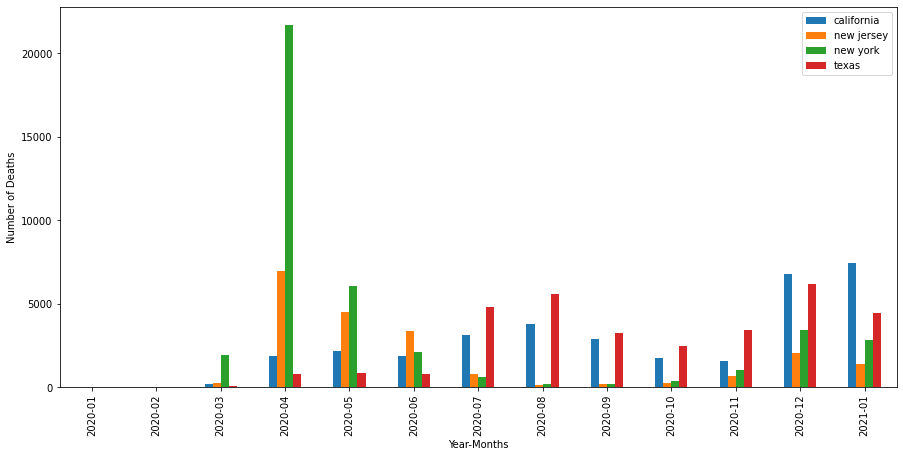

In [619]:
# Covid19 Death Cases per Month in High Risk States 
date = pd.Series(df['year_month'].unique()).sort_values(ascending=True)
california = df[df.state == 'California'][['year_month', 'new deaths']].groupby(['year_month']).sum()
newjersey = df[df.state == 'New Jersey'][['year_month', 'new deaths']].groupby(['year_month']).sum()
newyork = df[df.state == 'New York'][['year_month', 'new deaths']].groupby(['year_month']).sum()
texas = df[df.state == 'Texas'][['year_month', 'new deaths']].groupby(['year_month']).sum()

ca = pd.Series(california['new deaths'])
nj = pd.Series(newjersey['new deaths'])
ny = pd.Series(newyork['new deaths'])
tx = pd.Series(texas['new deaths'])

new_df = pd.DataFrame({'california': ca, 'new jersey': nj, 'new york': ny, 'texas': tx})
new_df = new_df.fillna(0)
ax = new_df.plot.bar(figsize=(15,7))
ax.set_xlabel("Year-Months")
ax.set_ylabel("Number of Deaths")

Analyzing New York's data for Covid 19

In [620]:
# New York DataFrame 
ny_df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
ny_df = ny_df[ny_df['state']=='New York'].sort_values(by=['date'])

# New York Total Data
print('Rows, Cols:', ny_df.shape)
print('\n')

# Beginning Data of New York 
print(ny_df.head())
print('\n')

# # Last Data of New York 
print(ny_df.tail())

Rows, Cols: (322, 5)


           date     state  fips  cases  deaths
246  2020-03-01  New York    36      1       0
261  2020-03-02  New York    36      1       0
276  2020-03-03  New York    36      2       0
293  2020-03-04  New York    36     11       0
313  2020-03-05  New York    36     22       0


             date     state  fips    cases  deaths
17372  2021-01-12  New York    36  1164819   39588
17427  2021-01-13  New York    36  1179523   39760
17482  2021-01-14  New York    36  1193710   39997
17537  2021-01-15  New York    36  1213179   40203
17592  2021-01-16  New York    36  1229124   40376


In [621]:
# Not a correct way of calculating total count bcoz data is cumulative
print(ny_df['cases'].sum())

144058132


Finding new covid 19 cases and deaths on daily basis (new cases added everyday)

In [622]:
# New Cases & New Deaths for New York
newcase = []
newdeath = []
previuos_case = 0
previous_death = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  current_death = row['deaths']
  newcase_count = current_case - previuos_case
  newdeath_count = current_death - previous_death
  previuos_case = current_case
  previous_death = current_death
  newcase.append(newcase_count)
  newdeath.append(newdeath_count)

ny_df['new cases'] = newcase
ny_df['new deaths'] = newdeath

ny_df

,date,state,fips,cases,deaths,new cases,new deaths
246,2020-03-01,New York,36,1,0,1,0
261,2020-03-02,New York,36,1,0,0,0
276,2020-03-03,New York,36,2,0,1,0
293,2020-03-04,New York,36,11,0,9,0
313,2020-03-05,New York,36,22,0,11,0
...,...,...,...,...,...,...,...
17372,2021-01-12,New York,36,1164819,39588,14791,184
17427,2021-01-13,New York,36,1179523,39760,14704,172
17482,2021-01-14,New York,36,1193710,39997,14187,237
17537,2021-01-15,New York,36,1213179,40203,19469,206


In [623]:
# Total Number of Cases in New York 
ny_df['cases'].max()

# or 

# Total Number of Cases in New York 
ny_df['new cases'].sum()

1229124

In [624]:
# First New Case in New York
first_ny_death = ny_df[ny_df['new cases']!=0]
first_ny_death.head(1)

,date,state,fips,cases,deaths,new cases,new deaths
246,2020-03-01,New York,36,1,0,1,0


In [625]:
# Recent New Case in New York
recent_ny_death = ny_df[ny_df['new cases']!=0]
recent_ny_death.tail(1)

,date,state,fips,cases,deaths,new cases,new deaths
17592,2021-01-16,New York,36,1229124,40376,15945,173


In [626]:
# Total Number of Deaths in New York 
ny_df['deaths'].max()

# or 

# Total Number of Deaths in New York 
ny_df['new deaths'].sum()

40376

In [627]:
# First death in New York
first_ny_death = ny_df[ny_df['new deaths']!=0]
first_ny_death.head(1)

,date,state,fips,cases,deaths,new cases,new deaths
669,2020-03-14,New York,36,610,2,189,2


In [628]:
# Recent death in New York
first_ny_death = ny_df[ny_df['new deaths']!=0]
first_ny_death.tail(1)

,date,state,fips,cases,deaths,new cases,new deaths
17592,2021-01-16,New York,36,1229124,40376,15945,173


In [629]:
# Store series into variable to help create visualization
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new cases']
ny_new_deaths = ny_df['new deaths']

In [630]:
# Double check if the variable is a serie
type(ny_new_cases)

pandas.core.series.Series

Text(0, 0.5, 'Total Number')

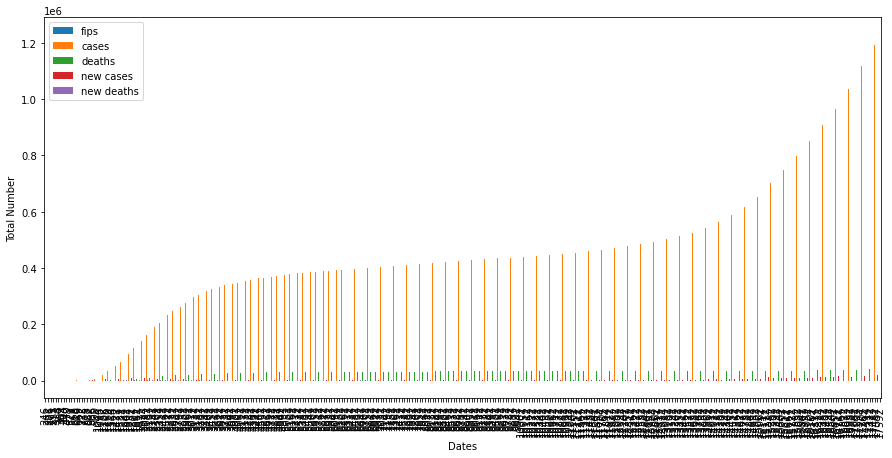

In [631]:
# Overall view of New York Cases/Deaths
ax = ny_df.plot.bar(figsize=(15,7));
ax.set_xlabel("Dates")
ax.set_ylabel("Total Number")

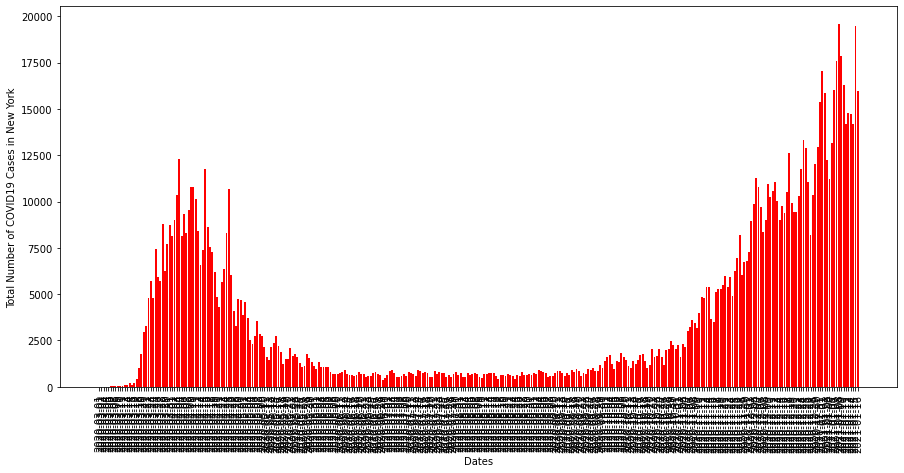

In [632]:
# Total Number of Cases in New York
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.xlabel('Dates')
plt.ylabel('Total Number of COVID19 Cases in New York')
plt.show()

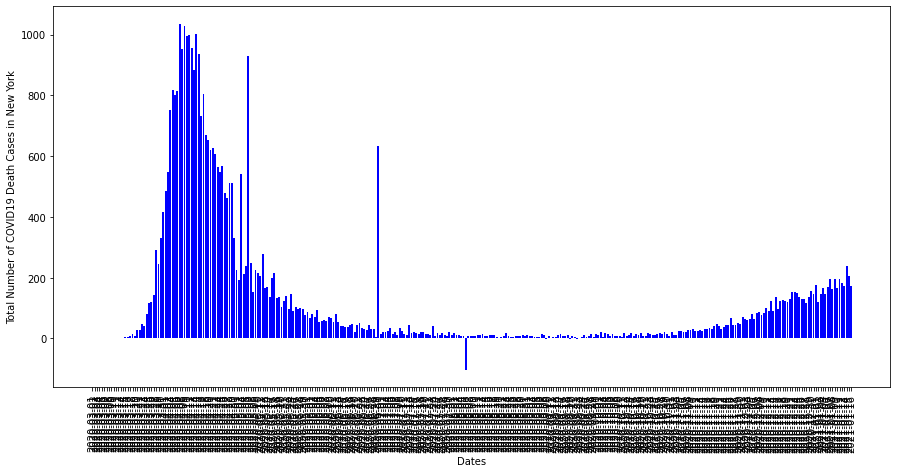

In [633]:
# Total Number of Death Cases in New York
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_deaths, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Dates')
plt.ylabel('Total Number of COVID19 Death Cases in New York')
plt.show()

Text(0, 0.5, 'Total Number')

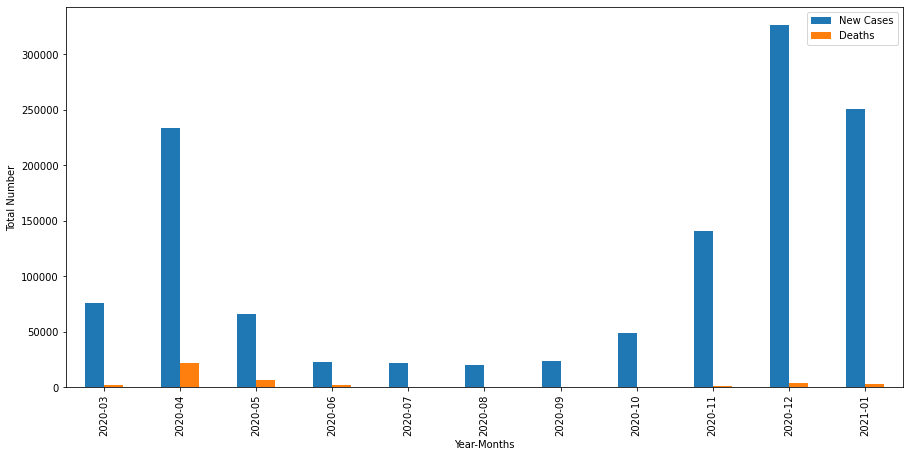

In [634]:
# Covid19 New Cases/Death Cases per Month in New York
date = pd.Series(df['year_month'].unique()).sort_values(ascending=True)
newyork_cases = df[df.state == 'New York'][['year_month', 'new cases']].groupby(['year_month']).sum()
newyork_deaths = df[df.state == 'New York'][['year_month', 'new deaths']].groupby(['year_month']).sum()

ny_cases = pd.Series(newyork_cases['new cases'])
ny_deaths = pd.Series(newyork_deaths['new deaths'])

new_df = pd.DataFrame({'New Cases': ny_cases, 'Deaths': ny_deaths})
new_df = new_df.fillna(0)
ax = new_df.plot.bar(figsize=(15,7))
ax.set_xlabel("Year-Months")
ax.set_ylabel("Total Number")

# Task4: Understand NY COVID 19 data in last 30 days

In [635]:
# Store series into variable to help create visualization
ny_cases_30 = ny_df['new cases'][-31:-1]
ny_deaths_30 = ny_df['new deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new cases'][-31:-1]
ny_new_deaths_30 = ny_df['new deaths'][-31:-1]

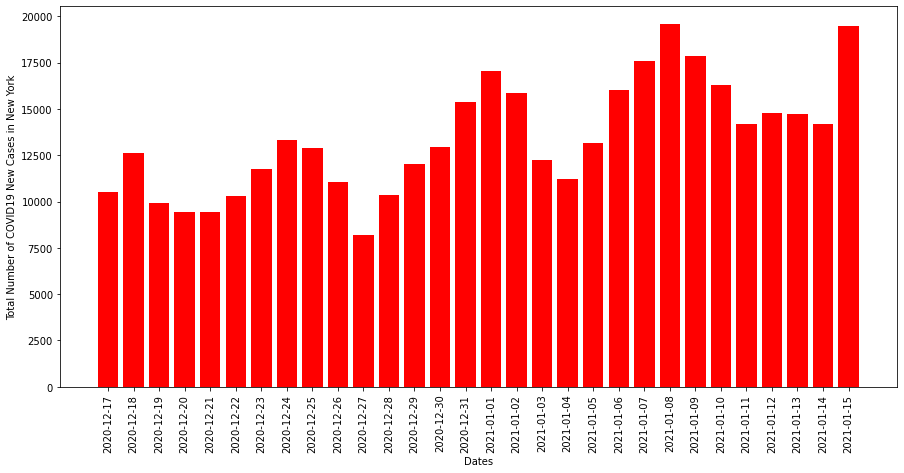

In [636]:
# ny_dates_30 New Cases
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.xlabel('Dates')
plt.ylabel('Total Number of COVID19 New Cases in New York')
plt.show()

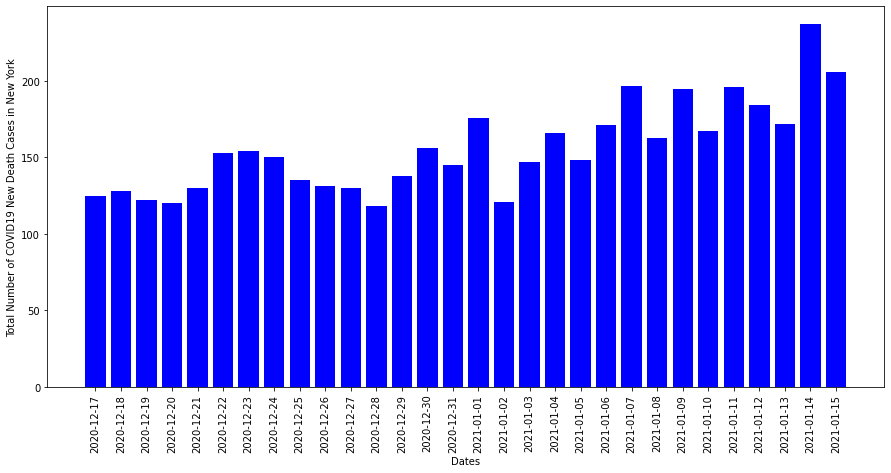

In [637]:
# ny_dates_30 Deaths
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Dates')
plt.ylabel('Total Number of COVID19 New Death Cases in New York')
plt.show()

# Comparing Covid 19 data with states that have large populations

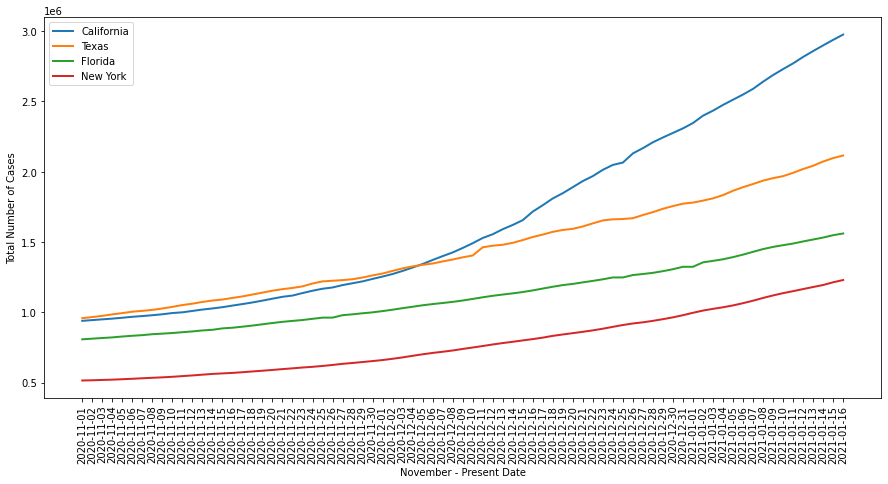

In [638]:
# Covid 19 cases after October for states: New York, California, Florida, Texas, Arizona
states = ['California','Texas','Florida', 'New York']
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.xlabel('November - Present Date')
plt.ylabel('Total Number of Cases')
plt.show()

# Findings

* **First ten states to have first time COVID19 cases**: 
Washington, Illinois, California, Arizona, Massachussets, Wisconsin, Texas, Nebraska, Utah, Oregon
* **Last ten states to have first COVID10 cases**: Maine, Alaska, Alabama, Idaho, Puerto Rico, Montana, Virgin Islands, Northern Mariana Islands
* **Top 5 states with recent number of high cases**: California, Texas, Florida, New York, Illinois 
* **Top 5 states with recent number of high cases**: California, Texas, Florida, New York, Illinois 
* **Top 5 states with recent number of low cases**: Hawaii, Vermont, Guam, Virgin Islands, Northern Mariana Islands
* **Top 5 states with a high rise in new cases**: California, Texas, New Jersey, Florida, Ohio
* **Top 5 states with a high drop in new cases**: Massachusetts, Louisiana, Arkansas, Puerto Rico, Georgia
* California, Florida, New Jersey, and Texas are states that have a high number of cases.
> California’s highest was in December 2020. 
> Florida’s highest was in July 2020.
> New Jersey’s highest was in December 2020.
> Texas’s highest was in January 2021.
* **First five states to have first COVID19 death cases**: Washington, California, Florida, South Dakota, New Jersey
* **Last four states to have first COVID19 death cases**: West Virginia, Hawaii, Northern Mariana Islands, Virgin Islands
* **Top five states to have a total high number of COVID19 death cases**: New York, California, Texas, Florida, New Jersey
* **Top five states to have a total low number of COVID19 death cases**: Alaska, Vermont, Guam, Virgin Islands, Northern Mariana Islands
* **Top five states to have a high number of COVID19 death cases in a day**: New Jersey, Texas, New York, California, Georgia
* **Top five states to have a low number of COVID19 death cases in a day**: Wyoming, Virgin Islands, Northern Mariana Islands, Hawaii, West Virginia 
* California, New Jersey, New York, and Texas are states with a high number of death cases with New York being the state with the largest deaths 
> California had the largest death in January 2021.
> New Jersey had the largest death in April 2020.
> New York had the largest death in April 2020.
> Texas had the largest death in December 2020.

New York 

* Beginning Date: 03-01-2020
  > Total Cases: 1 

  > Total Deaths: 0

  > Cases on date: 1

  > Deaths on date: 0  

* Recent Date: 01-16-2021
  > Total Cases: 1,229,124

  > Total Deaths: 40,376

  > Cases on date: 15,945

  > Deaths on date: 173
* New York has a higher number of cases from December to now, but less death cases compared to spring time. 
* The larger the population of a state, the more COVID19 cases. 



# Conclusion

Overall, states with the most population seem to have a high rise in COVID19 cases. However, it was interesting to see that even though New York was not considered to have a high number of cases compared to other states, it had the most deaths in the early stage. A possible answer to this may be because of the lack of readiness in hospitals and poor regulations by the state. New York seems to be doing much better now as the number of cases rise with very few death cases. However, it is still the state with the highest number of deaths. Hence, further analysis on New York's protocols, number of hospitals, and hospital regulations compared to other states will be necessary to understand the high number of death cases. 
